In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

데이터 불러오기

In [2]:
subway = pd.read_csv('subway.csv', encoding='CP949')

작업일자 제외

In [3]:
subway = subway.iloc[:,0:7]

중복데이터 제거

In [4]:
subway = subway.drop_duplicates(['사용월','호선명','지하철역','유임승차인원','무임승차인원','유임하차인원','무임하차인원'])

연도, 월 분리

In [5]:
subway["연도"] = subway["사용월"].astype(str).str[:4]
subway["월"] = subway["사용월"].astype(str).str[4:]

9호선2~3단계, 9호선2단계 >> 9호선 으로 변경

In [6]:
subway.loc[subway['호선명'] == '9호선2~3단계','호선명'] = '9호선'
subway.loc[subway['호선명'] == '9호선2단계','호선명'] = '9호선'

1호선 ~ 9호선 데이터만 선택

In [7]:
sub1 = subway[subway['호선명'] == '1호선']
sub2 = subway[subway['호선명'] == '2호선']
sub3 = subway[subway['호선명'] == '3호선']
sub4 = subway[subway['호선명'] == '4호선']
sub5 = subway[subway['호선명'] == '5호선']
sub6 = subway[subway['호선명'] == '6호선']
sub7 = subway[subway['호선명'] == '7호선']
sub8 = subway[subway['호선명'] == '8호선']
sub9 = subway[subway['호선명'] == '9호선']

sub = pd.concat([sub1,sub2,sub3,sub4,sub5,sub6,sub7,sub8,sub9]).reset_index(drop=True)
#sub = sub.reset_index(drop=True)

sub.호선명.values

array(['1호선', '1호선', '1호선', ..., '9호선', '9호선', '9호선'], dtype=object)

In [8]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19779 entries, 0 to 19778
Data columns (total 9 columns):
사용월       19779 non-null int64
호선명       19779 non-null object
지하철역      19779 non-null object
유임승차인원    19779 non-null int64
무임승차인원    19779 non-null int64
유임하차인원    19779 non-null int64
무임하차인원    19779 non-null int64
연도        19779 non-null object
월         19779 non-null object
dtypes: int64(5), object(4)
memory usage: 1.4+ MB


만 명 단위로 변경

In [9]:
col_list = ['유임승차인원','무임승차인원','유임하차인원','무임하차인원']
sub[col_list] = sub[col_list]/10000

유임승하차인원, 무임승하차인원, 승하차인원 열추가

In [11]:
sub.loc[:,'유임승하차인원'] = (sub['유임승차인원']+sub['유임하차인원'])
sub.loc[:,'무임승하차인원'] = (sub['무임승차인원']+sub['무임하차인원'])
sub.loc[:,'승하차인원'] = (sub['유임승하차인원']+sub['무임승하차인원'])

승차인원, 하차인원 열 추가

In [12]:
sub.loc[:,'승차인원'] = (sub['유임승차인원']+sub['무임승차인원'])
sub.loc[:,'하차인원'] = (sub['유임하차인원']+sub['무임하차인원'])

유,무임하차율 열 추가

In [13]:
sub.loc[:,'유임하차율'] = sub['유임하차인원']/sub['하차인원']*100
sub.loc[:,'무임하차율'] = sub['무임하차인원']/sub['하차인원']*100

In [14]:
sub.head()

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원,연도,월,유임승하차인원,무임승하차인원,승하차인원,승차인원,하차인원,유임하차율,무임하차율
0,202004,1호선,서울역,77.5859,13.9595,74.8330,13.0554,2020,04,152.4189,27.0149,179.4338,91.5454,87.8884,85.145480,14.854520
1,202004,1호선,종각,70.6082,9.6784,68.7093,9.0826,2020,04,139.3175,18.7610,158.0785,80.2866,77.7919,88.324491,11.675509
2,202004,1호선,종로3가,38.8837,23.1829,36.8220,22.0625,2020,04,75.7057,45.2454,120.9511,62.0666,58.8845,62.532585,37.467415
3,202004,1호선,신설동,24.0865,9.0729,23.9399,8.6446,2020,04,48.0264,17.7175,65.7439,33.1594,32.5845,73.470208,26.529792
4,202004,1호선,시청,38.1606,5.2670,38.4171,5.0782,2020,04,76.5777,10.3452,86.9229,43.4276,43.4953,88.324716,11.675284


2018년 12월 ~ 2019년 4월 데이터

In [15]:
sub_1812_1904 = sub[(sub.사용월 == 201812) | (sub.사용월 == 201901) | 
                    (sub.사용월 == 201902) | (sub.사용월 == 201903) | (sub.사용월 == 201904)]

2019년 12월 ~ 2020년 4월 데이터

In [16]:
sub_1912_2004 = sub[(sub.사용월 == 201912) | (sub.사용월 == 202001) | 
                    (sub.사용월 == 202002) | (sub.사용월 == 202003) | (sub.사용월 == 202004)]

2019년 1월 ~ 2019년 4월 데이터, 2019년 12월 ~ 2020년 4월 데이터 비교

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


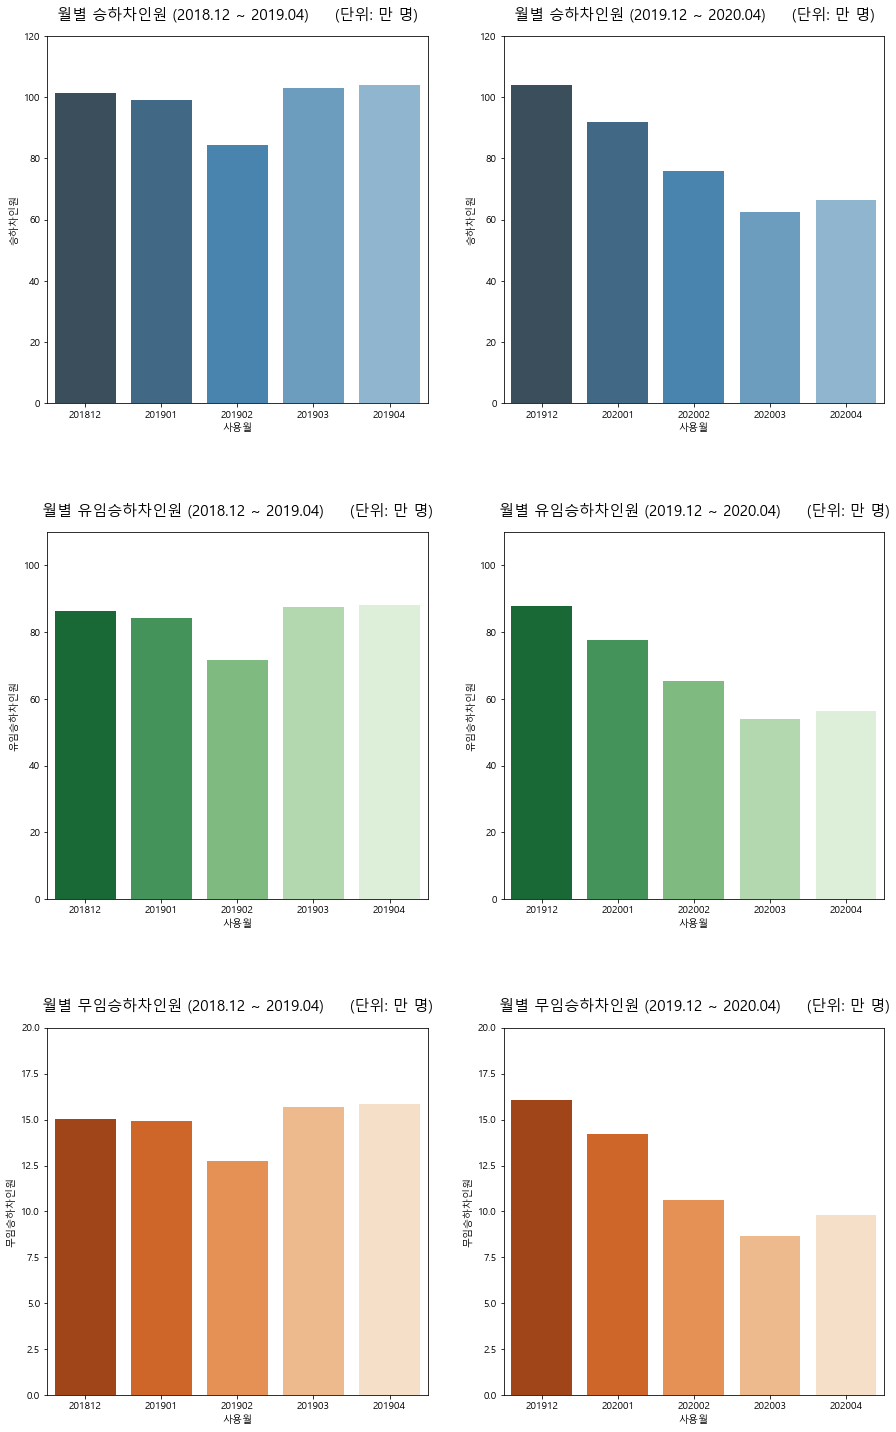

In [17]:
plt.figure(figsize=(15,25))
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.subplot(3,2,1)
plt.ylim(0,120)
plt.title('월별 승하차인원 (2018.12 ~ 2019.04)     (단위: 만 명)', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='사용월', y='승하차인원', data=sub_1812_1904, ci=False, palette="Blues_d")

plt.subplot(3,2,2)
plt.ylim(0,120)
plt.title('월별 승하차인원 (2019.12 ~ 2020.04)     (단위: 만 명)', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='사용월', y='승하차인원', data=sub_1912_2004, ci=False, palette="Blues_d");

plt.subplot(3,2,3)
plt.ylim(0,110)
plt.title('월별 유임승하차인원 (2018.12 ~ 2019.04)     (단위: 만 명)', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='사용월', y='유임승하차인원', data=sub_1812_1904, ci=False, palette="Greens_r")

plt.subplot(3,2,4)
plt.ylim(0,110)
plt.title('월별 유임승하차인원 (2019.12 ~ 2020.04)     (단위: 만 명)', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='사용월', y='유임승하차인원', data=sub_1912_2004, ci=False, palette="Greens_r")

plt.subplot(3,2,5)
plt.ylim(0,20)
plt.title('월별 무임승하차인원 (2018.12 ~ 2019.04)     (단위: 만 명)', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='사용월', y='무임승하차인원', data=sub_1812_1904, ci=False, palette="Oranges_r")

plt.subplot(3,2,6)
plt.ylim(0,20)
plt.title('월별 무임승하차인원 (2019.12 ~ 2020.04)     (단위: 만 명)', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='사용월', y='무임승하차인원', data=sub_1912_2004, ci=False, palette="Oranges_r")

plt.subplots_adjust(hspace=0.35)   # 그래프 간 위아래 간격 조정
plt.show()

호선별 무임하차율 시각화

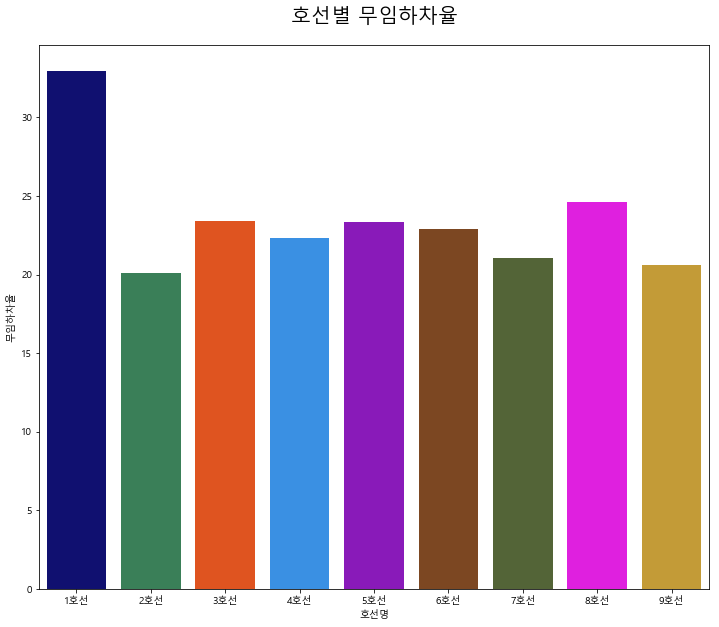

In [18]:
plt.figure(figsize=(12,10))
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('호선별 무임하차율', size=20, position=(0.5, 1.0+0.03))
pal = ['navy','seagreen','orangered','dodgerblue','darkviolet','saddlebrown','darkolivegreen','magenta','goldenrod']

sns.barplot(x='호선명', y='무임하차율', data=sub, ci=False, palette=pal)

연도별 무임하차율 top10

In [129]:
station = sub_15['지하철역'].unique()
get_off = []
for st in station:
    num = sub_15[sub_15['지하철역']==st]['무임하차인원'].sum()
    den = sub_15[sub_15['지하철역']==st]['하차인원'].sum()
    get_off.append(num/den*100)
    
sub_15_get_off = pd.DataFrame({'지하철역':station, '무임하차율':get_off})
sub_15_get_off = sub_15_get_off.sort_values(['무임하차율'], ascending=[False]).reset_index(drop=True)[:10]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ""

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ""

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ""

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ""

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ""

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path

In [130]:
station = sub_16['지하철역'].unique()
get_off = []
for st in station:
    num = sub_16[sub_16['지하철역']==st]['무임하차인원'].sum()
    den = sub_16[sub_16['지하철역']==st]['하차인원'].sum()
    get_off.append(num/den*100)
    
sub_16_get_off = pd.DataFrame({'지하철역':station, '무임하차율':get_off})
sub_16_get_off = sub_16_get_off.sort_values(['무임하차율'], ascending=[False]).reset_index(drop=True)[:10]


In [131]:
station = sub_17['지하철역'].unique()
get_off = []
for st in station:
    num = sub_17[sub_17['지하철역']==st]['무임하차인원'].sum()
    den = sub_17[sub_17['지하철역']==st]['하차인원'].sum()
    get_off.append(num/den*100)
    
sub_17_get_off = pd.DataFrame({'지하철역':station, '무임하차율':get_off})
sub_17_get_off = sub_17_get_off.sort_values(['무임하차율'], ascending=[False]).reset_index(drop=True)[:10]

In [132]:
station = sub_18['지하철역'].unique()
get_off = []
for st in station:
    num = sub_18[sub_18['지하철역']==st]['무임하차인원'].sum()
    den = sub_18[sub_18['지하철역']==st]['하차인원'].sum()
    get_off.append(num/den*100)
    
sub_18_get_off = pd.DataFrame({'지하철역':station, '무임하차율':get_off})
sub_18_get_off = sub_18_get_off.sort_values(['무임하차율'], ascending=[False]).reset_index(drop=True)[:10]

In [133]:
station = sub_19['지하철역'].unique()
get_off = []
for st in station:
    num = sub_19[sub_19['지하철역']==st]['무임하차인원'].sum()
    den = sub_19[sub_19['지하철역']==st]['하차인원'].sum()
    get_off.append(num/den*100)
    
sub_19_get_off = pd.DataFrame({'지하철역':station, '무임하차율':get_off})
sub_19_get_off = sub_19_get_off.sort_values(['무임하차율'], ascending=[False]).reset_index(drop=True)[:10]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


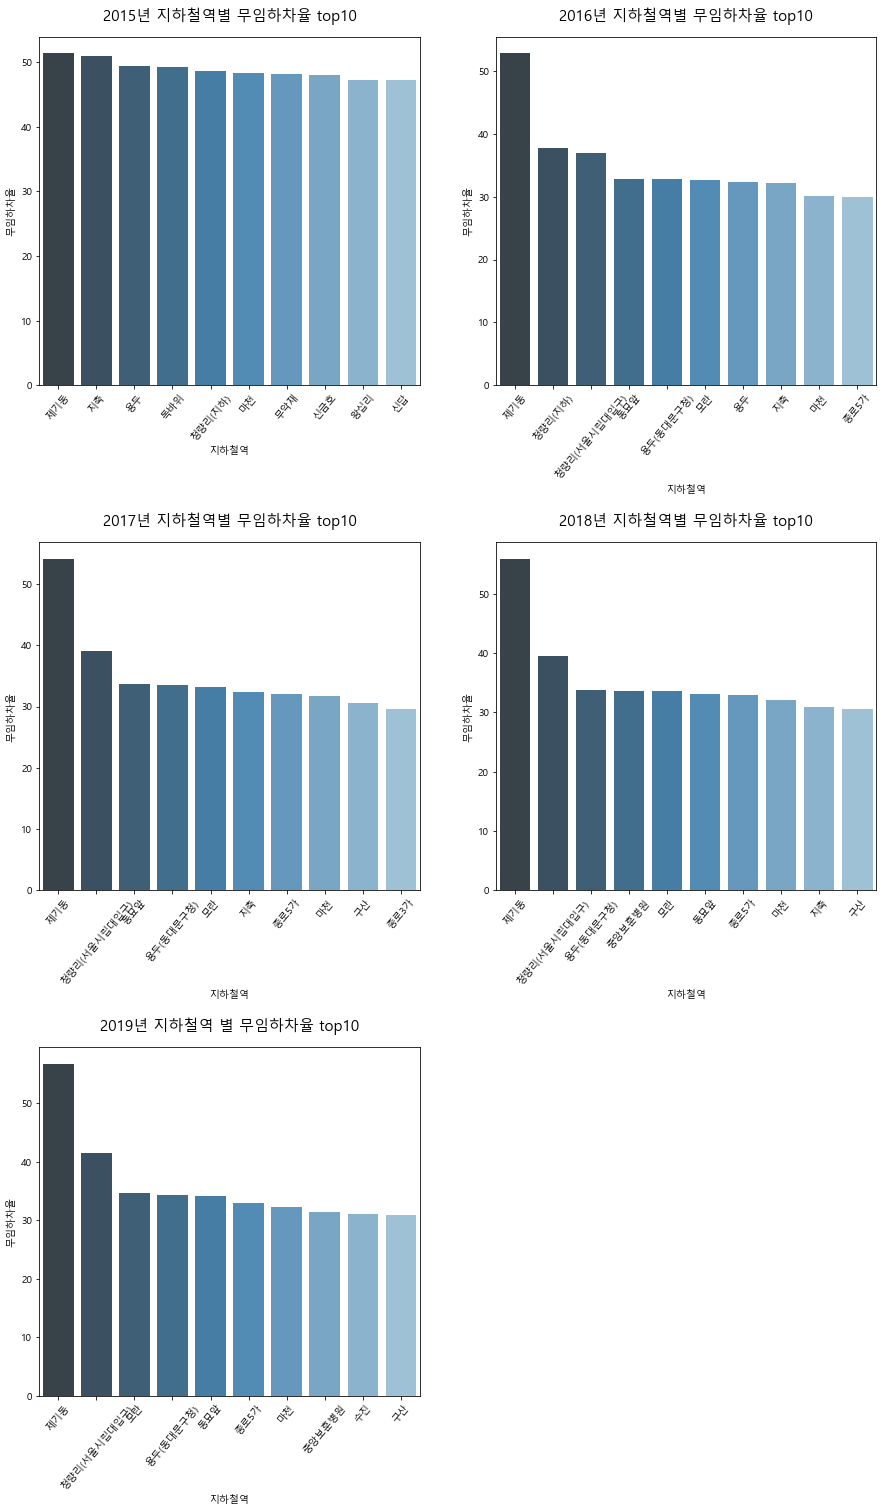

In [152]:
plt.figure(figsize=(15,25))
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.subplot(3,2,1)
plt.xticks(rotation=50)
plt.title('2015년 지하철역별 무임하차율 top10', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='지하철역', y='무임하차율', data=sub_15_get_off, ci=False, palette="Blues_d")

plt.subplot(3,2,2)
plt.xticks(rotation=50)
plt.title('2016년 지하철역별 무임하차율 top10', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='지하철역', y='무임하차율', data=sub_16_get_off, ci=False, palette="Blues_d")

plt.subplot(3,2,3)
plt.xticks(rotation=50)
plt.title('2017년 지하철역별 무임하차율 top10', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='지하철역', y='무임하차율', data=sub_17_get_off, ci=False, palette="Blues_d")

plt.subplot(3,2,4)
plt.xticks(rotation=50)
plt.title('2018년 지하철역별 무임하차율 top10', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='지하철역', y='무임하차율', data=sub_18_get_off, ci=False, palette="Blues_d")

plt.subplot(3,2,5)
plt.xticks(rotation=50)
plt.title('2019년 지하철역 별 무임하차율 top10', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='지하철역', y='무임하차율', data=sub_19_get_off, ci=False, palette="Blues_d")

plt.subplots_adjust(hspace=0.45)
plt.show()

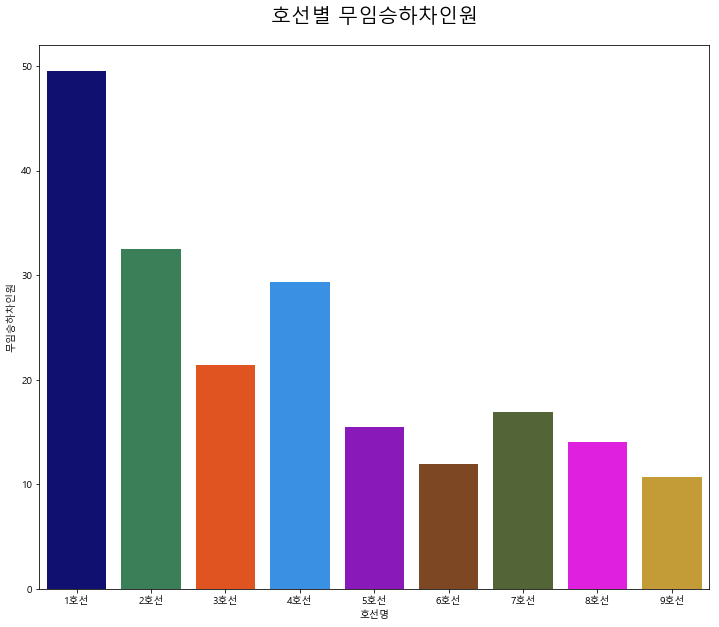

In [19]:
plt.figure(figsize=(12,10))
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('호선별 무임승하차인원', size=20, position=(0.5, 1.0+0.03))
pal = ['navy','seagreen','orangered','dodgerblue','darkviolet','saddlebrown','darkolivegreen','magenta','goldenrod']

sns.barplot(x='호선명', y='무임승하차인원', data=sub, ci=False, palette=pal);

지하철역별 승하차인원

In [20]:
sub_15 = sub[sub.연도 == '2015'].reset_index(drop=True)
sub_16 = sub[sub.연도 == '2016'].reset_index(drop=True)
sub_17 = sub[sub.연도 == '2017'].reset_index(drop=True)
sub_18 = sub[sub.연도 == '2018'].reset_index(drop=True)
sub_19 = sub[sub.연도 == '2019'].reset_index(drop=True)

In [21]:
# 15년도 지하철역별 승하차인원
grouped = sub_15['승하차인원'].groupby(sub['지하철역']).sum()
df_15 = pd.DataFrame({'지하철역':grouped.index,'승하차인원':grouped}).reset_index(drop=True)
top10_15 = df_15.sort_values(['승하차인원'], ascending=[False]).head(10).reset_index(drop=True)

# 16년도 지하철역별 승하차인원
grouped = sub_16['승하차인원'].groupby(sub['지하철역']).sum()
df_16 = pd.DataFrame({'지하철역':grouped.index,'승하차인원':grouped}).reset_index(drop=True)
top10_16 = df_16.sort_values(['승하차인원'], ascending=[False]).head(10).reset_index(drop=True)

# 17년도 지하철역별 승하차인원
grouped = sub_17['승하차인원'].groupby(sub['지하철역']).sum()
df_17 = pd.DataFrame({'지하철역':grouped.index,'승하차인원':grouped}).reset_index(drop=True)
top10_17 = df_17.sort_values(['승하차인원'], ascending=[False]).head(10).reset_index(drop=True)

# 18년도 지하철역별 승하차인원
grouped = sub_18['승하차인원'].groupby(sub['지하철역']).sum()
df_18 = pd.DataFrame({'지하철역':grouped.index,'승하차인원':grouped}).reset_index(drop=True)
top10_18 = df_18.sort_values(['승하차인원'], ascending=[False]).head(10).reset_index(drop=True)

# 19년도 지하철역별 승하차인원
grouped = sub_19['승하차인원'].groupby(sub['지하철역']).sum()
df_19 = pd.DataFrame({'지하철역':grouped.index,'승하차인원':grouped}).reset_index(drop=True)
top10_19 = df_19.sort_values(['승하차인원'], ascending=[False]).head(10).reset_index(drop=True)

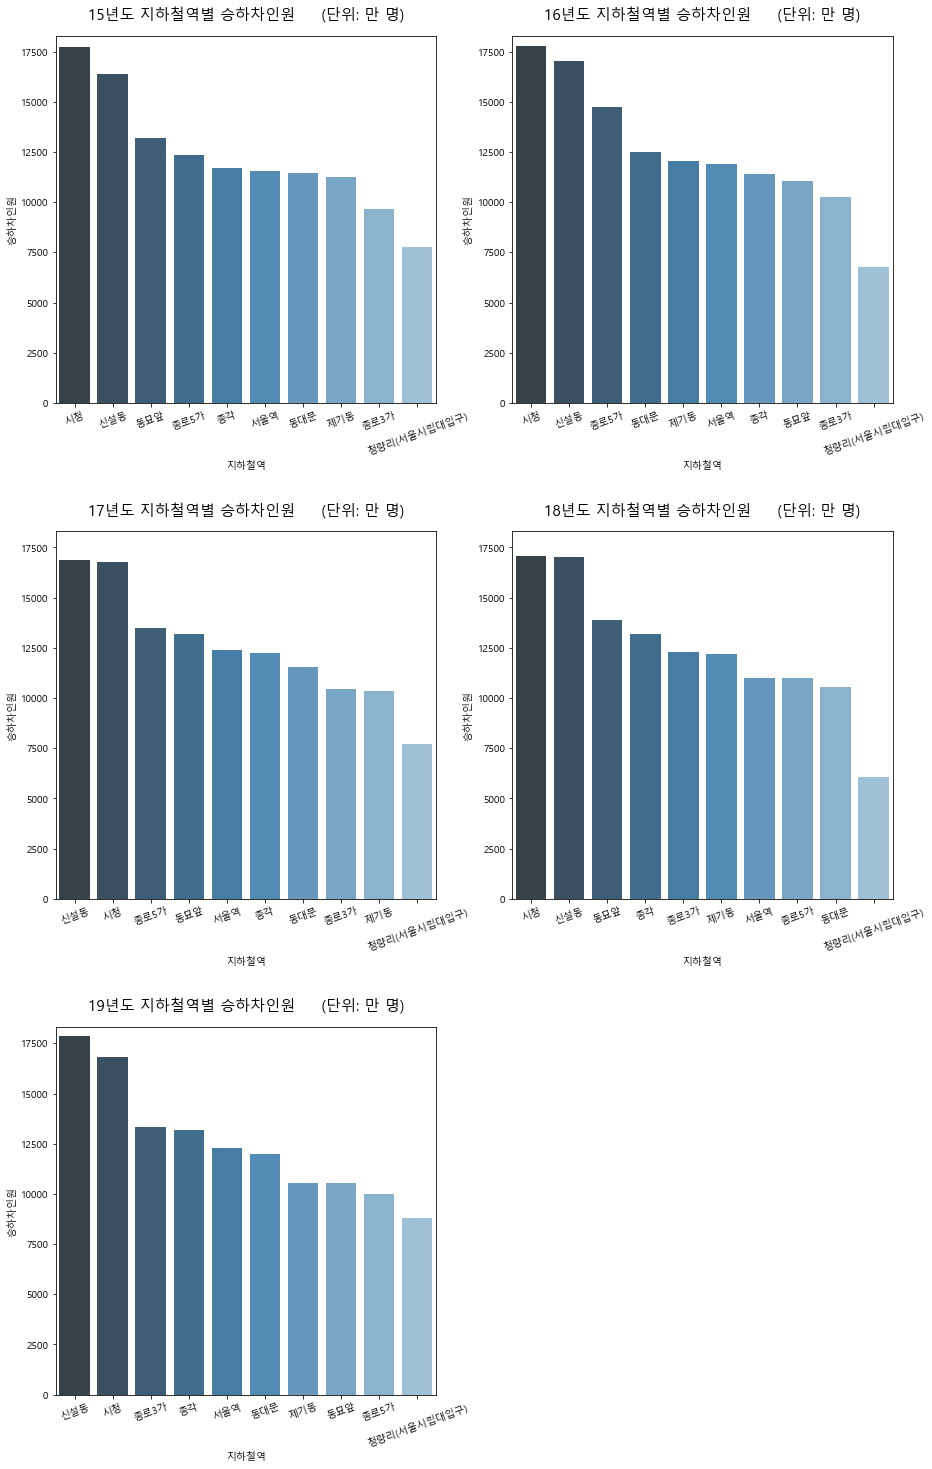

In [22]:
plt.figure(figsize=(15,25))
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.subplot(3,2,1)
plt.ylim(0,18300)
plt.xticks(rotation=20)
plt.title('15년도 지하철역별 승하차인원     (단위: 만 명)', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='지하철역', y='승하차인원', data=top10_15, ci=False, palette="Blues_d")

plt.subplot(3,2,2)
plt.ylim(0,18300)
plt.xticks(rotation=20)
plt.title('16년도 지하철역별 승하차인원     (단위: 만 명)', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='지하철역', y='승하차인원', data=top10_16, ci=False, palette="Blues_d")

plt.subplot(3,2,3)
plt.ylim(0,18300)
plt.xticks(rotation=20)
plt.title('17년도 지하철역별 승하차인원     (단위: 만 명)', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='지하철역', y='승하차인원', data=top10_17, ci=False, palette="Blues_d")

plt.subplot(3,2,4)
plt.ylim(0,18300)
plt.xticks(rotation=20)
plt.title('18년도 지하철역별 승하차인원     (단위: 만 명)', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='지하철역', y='승하차인원', data=top10_18, ci=False, palette="Blues_d")

plt.subplot(3,2,5)
plt.ylim(0,18300)
plt.xticks(rotation=20)
plt.title('19년도 지하철역별 승하차인원     (단위: 만 명)', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='지하철역', y='승하차인원', data=top10_19, ci=False, palette="Blues_d")

plt.subplots_adjust(hspace=0.35)
plt.show()

연도별 승하차인원 변동 추이

In [23]:
grouped = sub['승하차인원'].groupby(sub['연도']).sum()
grouped_year = pd.DataFrame({'연도':grouped.index,'승하차인원':grouped}).reset_index(drop=True)
grouped_year[:5]

,연도,승하차인원
0,2015,363742.1511
1,2016,374006.4214
2,2017,369687.5887
3,2018,370766.6441
4,2019,378208.9830


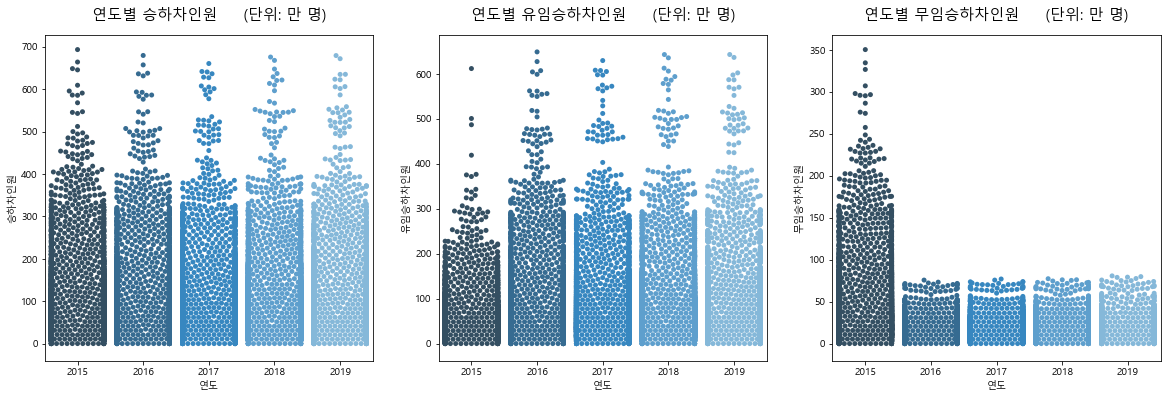

In [170]:
plt.figure(figsize=(20,6))
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.subplot(1,3,1)
plt.xticks(ticks=[0,1,2,3,4], labels=['2015','2016','2017','2018','2019'])
plt.title('연도별 승하차인원     (단위: 만 명)', size=15, position=(0.5, 1.0+0.03))
sns.swarmplot(x='연도', y='승하차인원', data=sub[sub['연도'] != '2020'], palette="Blues_d")

plt.subplot(1,3,2)
plt.xticks(ticks=[0,1,2,3,4], labels=['2015','2016','2017','2018','2019'])
plt.title('연도별 유임승하차인원     (단위: 만 명)', size=15, position=(0.5, 1.0+0.03))
sns.swarmplot(x='연도', y='유임승하차인원', data=sub[sub['연도'] != '2020'], palette="Blues_d")

plt.subplot(1,3,3)
plt.xticks(ticks=[0,1,2,3,4], labels=['2015','2016','2017','2018','2019'])
plt.title('연도별 무임승하차인원     (단위: 만 명)', size=15, position=(0.5, 1.0+0.03))
sns.swarmplot(x='연도', y='무임승하차인원', data=sub[sub['연도'] != '2020'], palette="Blues_d")

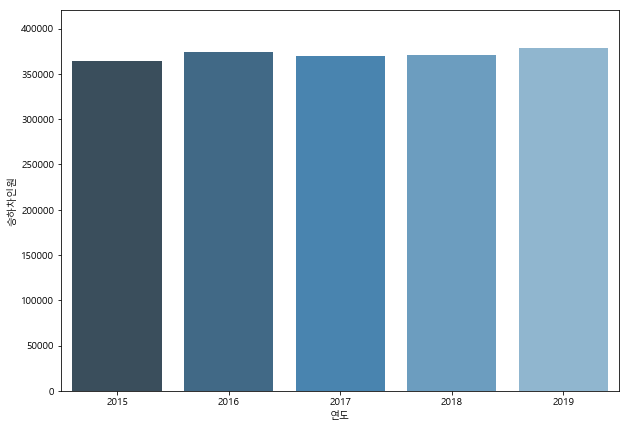

In [24]:
plt.figure(figsize=(10,7))
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.ylim(0,420000)

sns.barplot(x='연도', y='승하차인원', data=grouped_year[:5], ci=False, palette="Blues_d")

In [25]:
grouped1 = sub['승하차인원'].groupby(sub['연도']).sum()
grouped2 = sub['유임승하차인원'].groupby(sub['연도']).sum()
grouped3 = sub['무임승하차인원'].groupby(sub['연도']).sum()

#grouped_year2 = pd.DataFrame({'승하차인원':grouped1,'유임승하차인원':grouped2,'무임승하차인원':grouped3}).reset_index(drop=True)
grouped_year2 = pd.DataFrame({'승하차인원':grouped1}).reset_index(drop=True)
grouped_year2.index = grouped_year['연도']

grouped_year2

,승하차인원
연도,
2015,363742.1511
2016,374006.4214
2017,369687.5887
2018,370766.6441
2019,378208.9830
2020,93747.1334


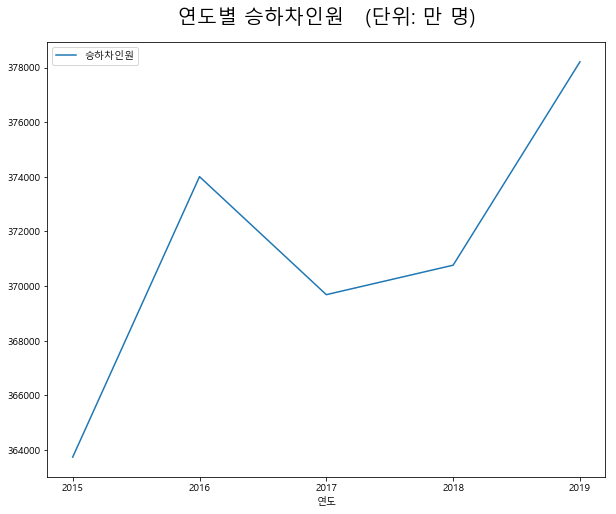

In [26]:
plt.figure(figsize=(10,8))
plt.title('연도별 승하차인원   (단위: 만 명)', size=20, position=(0.5, 1.0+0.03))
sns.lineplot(data=grouped_year2[:5])

2015년

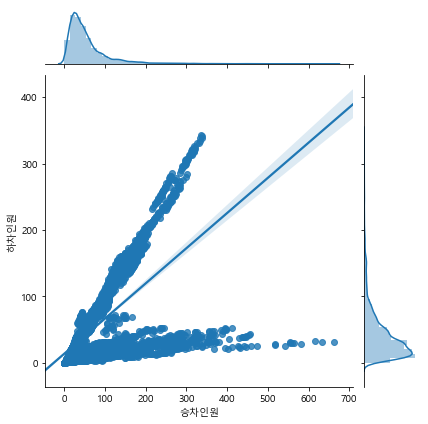

In [49]:
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.jointplot(x="승차인원", y="하차인원", data=sub, kind='reg')

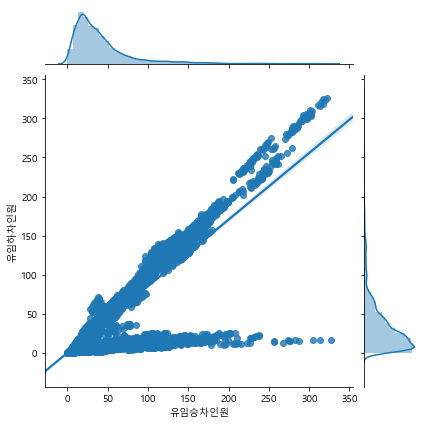

In [40]:
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.jointplot(x="유임승차인원", y="유임하차인원", data=sub, kind='reg')

ValueError: 'c' argument must either be valid as mpl color(s) or as numbers to be mapped to colors. Here c = 0       1호선
1       1호선
2       1호선
3       1호선
4       1호선
5       1호선
6       1호선
7       1호선
8       1호선
9       1호선
10      1호선
11      1호선
12      1호선
13      1호선
14      1호선
15      1호선
16      1호선
17      1호선
18      1호선
19      1호선
20      1호선
21      1호선
22      1호선
23      1호선
24      1호선
25      1호선
26      1호선
27      1호선
28      1호선
29      1호선
       ... 
3644    9호선
3645    9호선
3646    9호선
3647    9호선
3648    9호선
3649    9호선
3650    9호선
3651    9호선
3652    9호선
3653    9호선
3654    9호선
3655    9호선
3656    9호선
3657    9호선
3658    9호선
3659    9호선
3660    9호선
3661    9호선
3662    9호선
3663    9호선
3664    9호선
3665    9호선
3666    9호선
3667    9호선
3668    9호선
3669    9호선
3670    9호선
3671    9호선
3672    9호선
3673    9호선
Name: 호선명, Length: 3674, dtype: object.

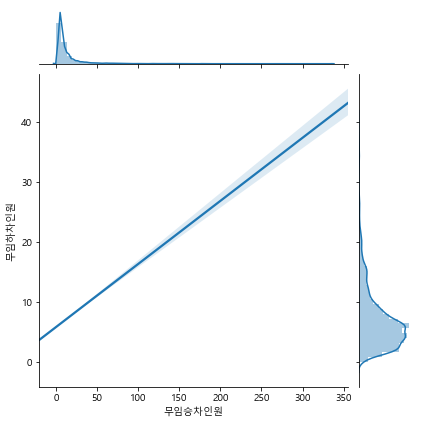

In [27]:
plt.rcParams['font.family'] = 'Malgun Gothic'
g = sns.jointplot(x="무임승차인원", y="무임하차인원", data=sub, kind='reg', scatter = False)
g.ax_joint.scatter(x="무임승차인원", y="무임하차인원", data=sub_15)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


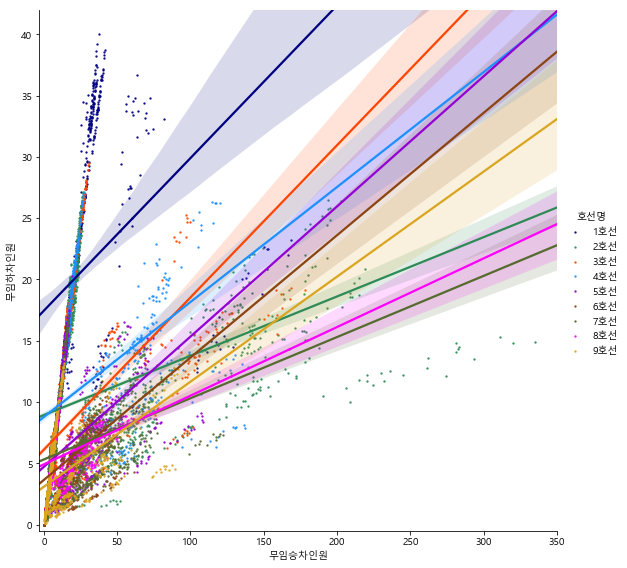

In [66]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False   # 그래프에서 마이너스 부호 깨짐 해결
pal = ['navy','seagreen','orangered','dodgerblue','darkviolet','saddlebrown','darkolivegreen','magenta','goldenrod']

g = sns.lmplot(x="승차인원", y="하차인원", hue='호선명', data=sub, 
               size=8, palette=pal, scatter_kws={'s':2})
g.set(ylim=(-.5, 350))
g.set(xlim=(-3, 700))

g = sns.lmplot(x="유임승차인원", y="유임하차인원", hue='호선명', data=sub, 
               size=8, palette=pal, scatter_kws={'s':2})
g.set(ylim=(-.5, 350))
g.set(xlim=(-3, 350))

g = sns.lmplot(x="무임승차인원", y="무임하차인원", hue='호선명', data=sub, 
               size=8, palette=pal, scatter_kws={'s':2})
g.set(ylim=(-.5, 42))
g.set(xlim=(-3, 350))

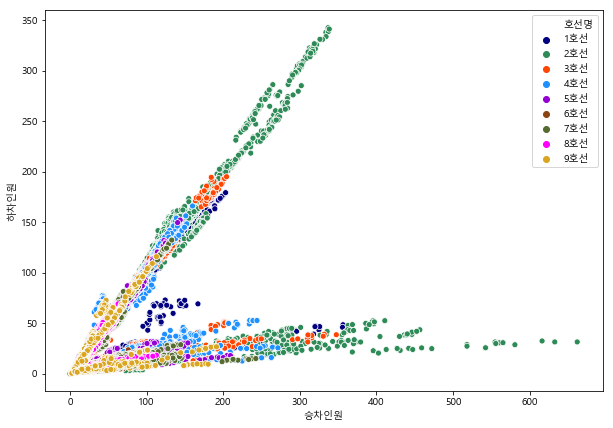

In [78]:
plt.figure(figsize=(10,7))

sns.scatterplot(x='승차인원', y='하차인원', hue='호선명', data=sub, palette=pal)

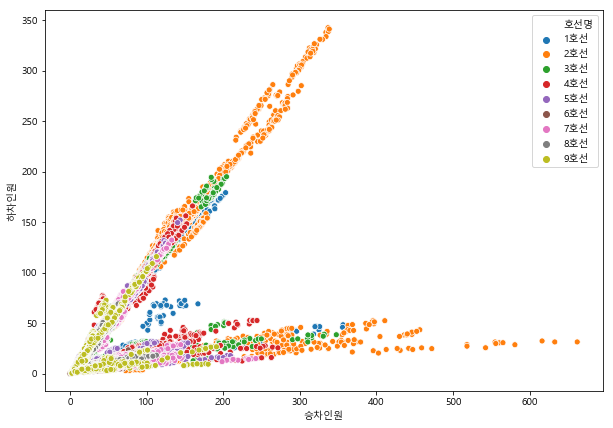

In [89]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='승차인원', y='하차인원', hue='호선명', data=sub)

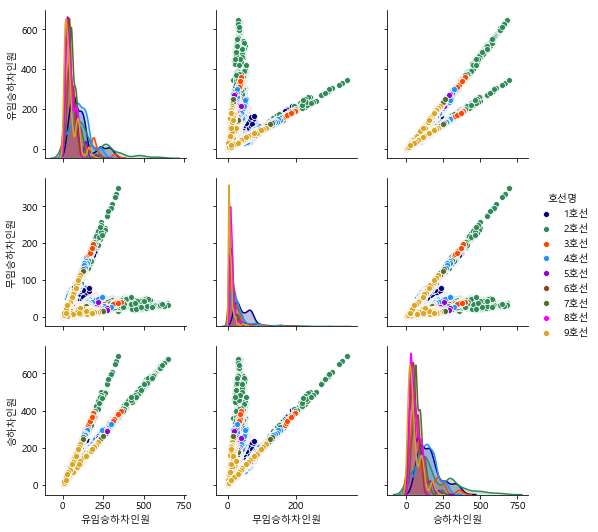

In [91]:
sns.pairplot(sub.iloc[:, [1,9,10,11]], hue='호선명', palette=pal);

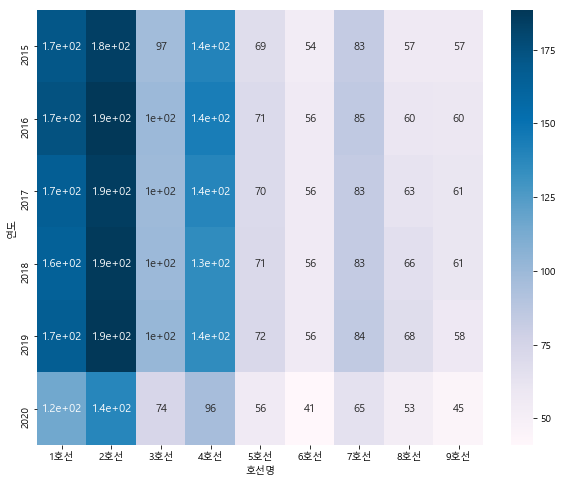

In [31]:
pivot = sub.pivot_table(index='연도', columns='호선명', values='승하차인원')
plt.figure(figsize=(10,8))
sns.heatmap(pivot, annot = True, annot_kws = {"size" : 11}, cmap=plt.cm.PuBu)

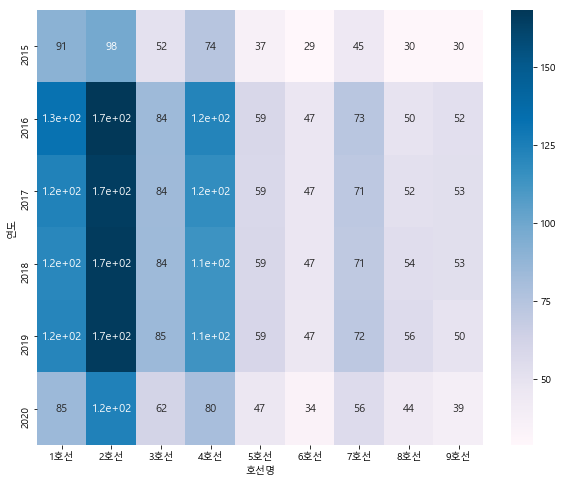

In [32]:
pivot = sub.pivot_table(index='연도', columns='호선명', values='유임승하차인원')
plt.figure(figsize=(10,8))
sns.heatmap(pivot, annot = True, annot_kws = {"size" : 11}, cmap=plt.cm.PuBu)

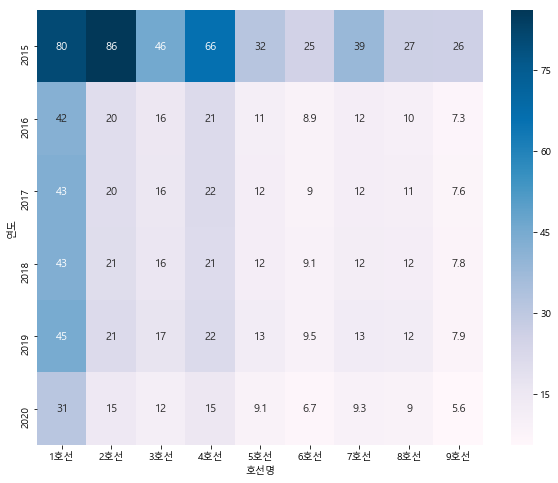

In [33]:
pivot = sub.pivot_table(index='연도', columns='호선명', values='무임승하차인원')
plt.figure(figsize=(10,8))
sns.heatmap(pivot, annot = True, annot_kws = {"size" : 11}, cmap=plt.cm.PuBu)

In [34]:
sub_h = sub_15.append(sub_16)
sub_h = sub_h.append(sub_17)
sub_h = sub_h.append(sub_18)
sub_h = sub_h.append(sub_19)

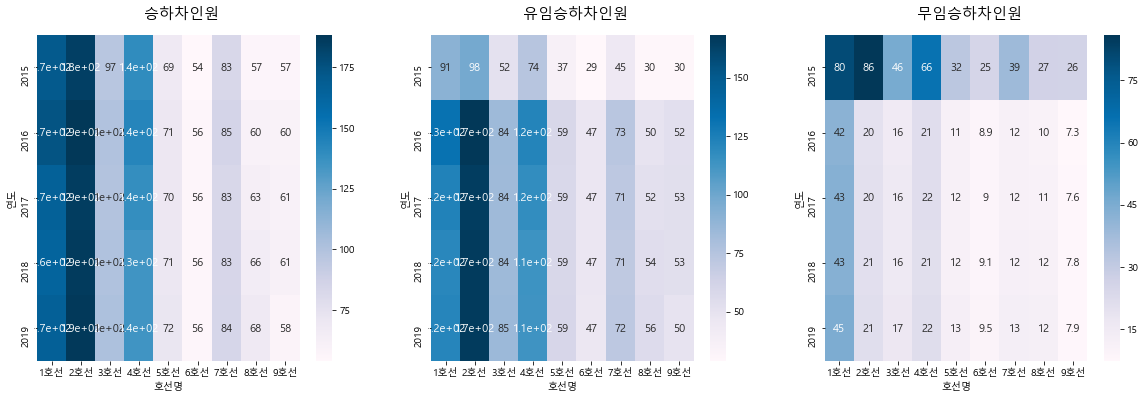

In [109]:
plt.figure(figsize=(20,6))
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.subplot(1,3,1)
plt.title('승하차인원', size=15, position=(0.55, 1.0+0.03))
pivot1 = sub_h.pivot_table(index='연도', columns='호선명', values='승하차인원')
sns.heatmap(pivot1, annot = True, annot_kws = {"size" : 11}, cmap=plt.cm.PuBu)

plt.subplot(1,3,2)
plt.title('유임승하차인원', size=15, position=(0.55, 1.0+0.03))
pivot2 = sub_h.pivot_table(index='연도', columns='호선명', values='유임승하차인원')
sns.heatmap(pivot2, annot = True, annot_kws = {"size" : 11}, cmap=plt.cm.PuBu)

plt.subplot(1,3,3)
plt.title('무임승하차인원', size=15, position=(0.55, 1.0+0.03))
pivot3 = sub_h.pivot_table(index='연도', columns='호선명', values='무임승하차인원')
sns.heatmap(pivot3, annot = True, annot_kws = {"size" : 11}, cmap=plt.cm.PuBu)